In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from tensorflow import keras 
import random
import scipy
import time
random.seed(1234)

/home/users/t_wand01/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/users/t_wand01/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/users/t_wand01/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/users/t_wand01/.local/lib/python3.7/site-packages/tensorflow/

In [2]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

In [3]:
def f(x):
    return(2 + x[:,1]**3. -2* x[:,2]**2 + np.exp(np.abs(x[:,6])) + 3*x[:,8]*x[:,9])

x = np.random.normal(size = (1000,10))
y = f(x) + 0.5*np.random.normal(size = x.shape[0])
xtest = np.random.normal(size = (1000,10))
ytest = f(xtest) + 0.5*np.random.normal(size = xtest.shape[0])

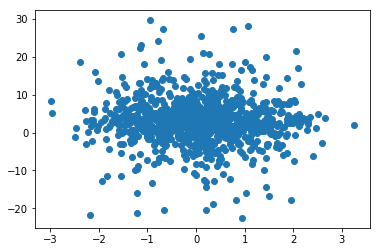

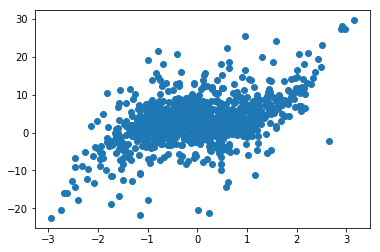

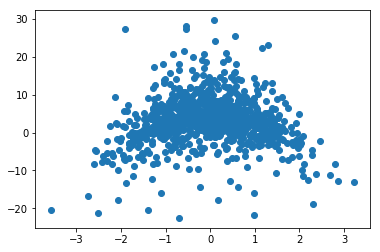

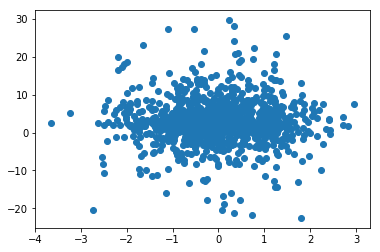

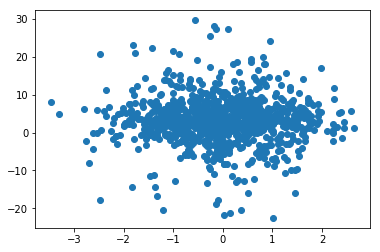

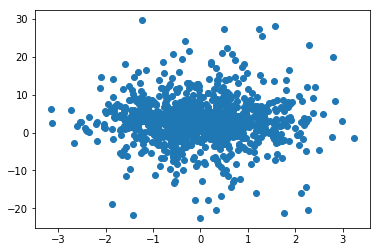

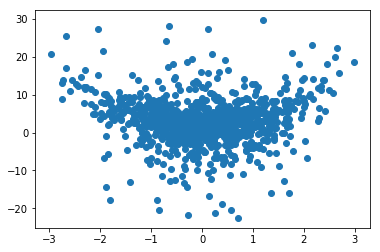

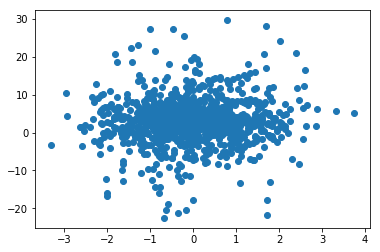

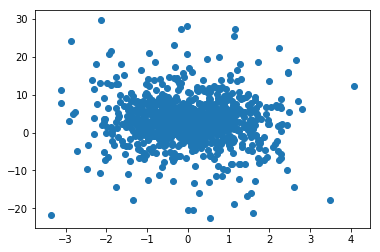

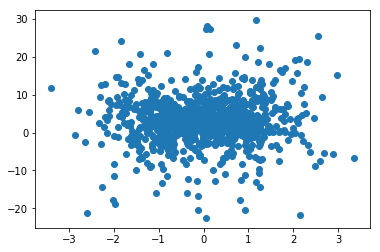

In [4]:
for i in range(x.shape[1]):
    plt.scatter(x[:,i], y)
    plt.show()

In [5]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 166,273
Trainable params: 166,273
Non-trainable params: 0
________________________________________________________________

In [7]:
NN_model.fit(x, y, epochs=500, batch_size=32, validation_split = 0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/500
800/800 [==============================] - 0s 44us/sample - loss: 0.1996 - mean_absolute_error: 0.1996 - val_loss: 1.2064 - val_mean_absolute_error: 1.2063
Epoch 2/500
800/800 [==============================] - 0s 46us/sample - loss: 0.1693 - mean_absolute_error: 0.1693 - val_loss: 1.2139 - val_mean_absolute_error: 1.2139
Epoch 3/500
800/800 [==============================] - 0s 42us/sample - loss: 0.1587 - mean_absolute_error: 0.1587 - val_loss: 1.1950 - val_mean_absolute_error: 1.1950
Epoch 4/500
800/800 [==============================] - 0s 47us/sample - loss: 0.1425 - mean_absolute_error: 0.1425 - val_loss: 1.1714 - val_mean_absolute_error: 1.1714
Epoch 5/500
800/800 [==============================] - 0s 44us/sample - loss: 0.1464 - mean_absolute_error: 0.1464 - val_loss: 1.2447 - val_mean_absolute_error: 1.2447
Epoch 6/500
800/800 [==============================] - 0s 43us/sample - loss: 0.2070 - mean_absolute_error: 0.2070

800/800 [==============================] - 0s 42us/sample - loss: 0.1327 - mean_absolute_error: 0.1327 - val_loss: 1.1741 - val_mean_absolute_error: 1.1741
Epoch 50/500
800/800 [==============================] - 0s 42us/sample - loss: 0.1273 - mean_absolute_error: 0.1273 - val_loss: 1.2360 - val_mean_absolute_error: 1.2360
Epoch 51/500
800/800 [==============================] - 0s 43us/sample - loss: 0.1471 - mean_absolute_error: 0.1471 - val_loss: 1.2773 - val_mean_absolute_error: 1.2773
Epoch 52/500
800/800 [==============================] - 0s 41us/sample - loss: 0.1648 - mean_absolute_error: 0.1648 - val_loss: 1.2330 - val_mean_absolute_error: 1.2330
Epoch 53/500
800/800 [==============================] - 0s 43us/sample - loss: 0.1361 - mean_absolute_error: 0.1361 - val_loss: 1.1579 - val_mean_absolute_error: 1.1579
Epoch 54/500
800/800 [==============================] - 0s 44us/sample - loss: 0.1514 - mean_absolute_error: 0.1514 - val_loss: 1.1618 - val_mean_absolute_error: 1.1618

800/800 [==============================] - 0s 43us/sample - loss: 0.1448 - mean_absolute_error: 0.1448 - val_loss: 1.2328 - val_mean_absolute_error: 1.2328
Epoch 98/500
800/800 [==============================] - 0s 44us/sample - loss: 0.1406 - mean_absolute_error: 0.1406 - val_loss: 1.2054 - val_mean_absolute_error: 1.2054
Epoch 99/500
800/800 [==============================] - 0s 42us/sample - loss: 0.1310 - mean_absolute_error: 0.1310 - val_loss: 1.1924 - val_mean_absolute_error: 1.1924
Epoch 100/500
800/800 [==============================] - 0s 44us/sample - loss: 0.1378 - mean_absolute_error: 0.1378 - val_loss: 1.2253 - val_mean_absolute_error: 1.2253
Epoch 101/500
800/800 [==============================] - 0s 41us/sample - loss: 0.1422 - mean_absolute_error: 0.1422 - val_loss: 1.2404 - val_mean_absolute_error: 1.2404
Epoch 102/500
800/800 [==============================] - 0s 43us/sample - loss: 0.1720 - mean_absolute_error: 0.1720 - val_loss: 1.1694 - val_mean_absolute_error: 1.1

800/800 [==============================] - 0s 45us/sample - loss: 0.1338 - mean_absolute_error: 0.1338 - val_loss: 1.1839 - val_mean_absolute_error: 1.1839
Epoch 146/500
800/800 [==============================] - 0s 43us/sample - loss: 0.1318 - mean_absolute_error: 0.1318 - val_loss: 1.2610 - val_mean_absolute_error: 1.2610
Epoch 147/500
800/800 [==============================] - 0s 40us/sample - loss: 0.1407 - mean_absolute_error: 0.1407 - val_loss: 1.2063 - val_mean_absolute_error: 1.2063
Epoch 148/500
800/800 [==============================] - 0s 42us/sample - loss: 0.1292 - mean_absolute_error: 0.1292 - val_loss: 1.1798 - val_mean_absolute_error: 1.1798
Epoch 149/500
800/800 [==============================] - 0s 43us/sample - loss: 0.1537 - mean_absolute_error: 0.1537 - val_loss: 1.2209 - val_mean_absolute_error: 1.2209
Epoch 150/500
800/800 [==============================] - 0s 41us/sample - loss: 0.1437 - mean_absolute_error: 0.1437 - val_loss: 1.2516 - val_mean_absolute_error: 1

800/800 [==============================] - 0s 41us/sample - loss: 0.1548 - mean_absolute_error: 0.1548 - val_loss: 1.2241 - val_mean_absolute_error: 1.2241
Epoch 194/500
800/800 [==============================] - 0s 43us/sample - loss: 0.1324 - mean_absolute_error: 0.1324 - val_loss: 1.1960 - val_mean_absolute_error: 1.1960
Epoch 195/500
800/800 [==============================] - 0s 42us/sample - loss: 0.1484 - mean_absolute_error: 0.1484 - val_loss: 1.2279 - val_mean_absolute_error: 1.2279
Epoch 196/500
800/800 [==============================] - 0s 41us/sample - loss: 0.1395 - mean_absolute_error: 0.1395 - val_loss: 1.2400 - val_mean_absolute_error: 1.2400
Epoch 197/500
800/800 [==============================] - 0s 43us/sample - loss: 0.1321 - mean_absolute_error: 0.1321 - val_loss: 1.2478 - val_mean_absolute_error: 1.2478
Epoch 198/500
800/800 [==============================] - 0s 43us/sample - loss: 0.1347 - mean_absolute_error: 0.1347 - val_loss: 1.2024 - val_mean_absolute_error: 1

800/800 [==============================] - 0s 43us/sample - loss: 0.1139 - mean_absolute_error: 0.1139 - val_loss: 1.2668 - val_mean_absolute_error: 1.2668
Epoch 242/500
800/800 [==============================] - 0s 44us/sample - loss: 0.1323 - mean_absolute_error: 0.1323 - val_loss: 1.2513 - val_mean_absolute_error: 1.2513
Epoch 243/500
800/800 [==============================] - 0s 44us/sample - loss: 0.1319 - mean_absolute_error: 0.1319 - val_loss: 1.1938 - val_mean_absolute_error: 1.1938
Epoch 244/500
800/800 [==============================] - 0s 43us/sample - loss: 0.1186 - mean_absolute_error: 0.1186 - val_loss: 1.2110 - val_mean_absolute_error: 1.2110
Epoch 245/500
800/800 [==============================] - 0s 42us/sample - loss: 0.1320 - mean_absolute_error: 0.1320 - val_loss: 1.1959 - val_mean_absolute_error: 1.1959
Epoch 246/500
800/800 [==============================] - 0s 44us/sample - loss: 0.1217 - mean_absolute_error: 0.1217 - val_loss: 1.2210 - val_mean_absolute_error: 1

800/800 [==============================] - 0s 41us/sample - loss: 0.1232 - mean_absolute_error: 0.1232 - val_loss: 1.2610 - val_mean_absolute_error: 1.2610
Epoch 290/500
800/800 [==============================] - 0s 43us/sample - loss: 0.1187 - mean_absolute_error: 0.1187 - val_loss: 1.2480 - val_mean_absolute_error: 1.2480
Epoch 291/500
800/800 [==============================] - 0s 43us/sample - loss: 0.1203 - mean_absolute_error: 0.1203 - val_loss: 1.2571 - val_mean_absolute_error: 1.2571
Epoch 292/500
800/800 [==============================] - 0s 41us/sample - loss: 0.1321 - mean_absolute_error: 0.1321 - val_loss: 1.2208 - val_mean_absolute_error: 1.2208
Epoch 293/500
800/800 [==============================] - 0s 41us/sample - loss: 0.1429 - mean_absolute_error: 0.1429 - val_loss: 1.2234 - val_mean_absolute_error: 1.2234
Epoch 294/500
800/800 [==============================] - 0s 41us/sample - loss: 0.1306 - mean_absolute_error: 0.1306 - val_loss: 1.2271 - val_mean_absolute_error: 1

800/800 [==============================] - 0s 44us/sample - loss: 0.1224 - mean_absolute_error: 0.1224 - val_loss: 1.2452 - val_mean_absolute_error: 1.2452
Epoch 338/500
800/800 [==============================] - 0s 44us/sample - loss: 0.1224 - mean_absolute_error: 0.1224 - val_loss: 1.2029 - val_mean_absolute_error: 1.2029
Epoch 339/500
800/800 [==============================] - 0s 42us/sample - loss: 0.1286 - mean_absolute_error: 0.1286 - val_loss: 1.2251 - val_mean_absolute_error: 1.2251
Epoch 340/500
800/800 [==============================] - 0s 46us/sample - loss: 0.1287 - mean_absolute_error: 0.1287 - val_loss: 1.1952 - val_mean_absolute_error: 1.1952
Epoch 341/500
800/800 [==============================] - 0s 43us/sample - loss: 0.1322 - mean_absolute_error: 0.1322 - val_loss: 1.2588 - val_mean_absolute_error: 1.2588
Epoch 342/500
800/800 [==============================] - 0s 40us/sample - loss: 0.1131 - mean_absolute_error: 0.1131 - val_loss: 1.2323 - val_mean_absolute_error: 1

800/800 [==============================] - 0s 45us/sample - loss: 0.1195 - mean_absolute_error: 0.1195 - val_loss: 1.2562 - val_mean_absolute_error: 1.2562
Epoch 386/500
800/800 [==============================] - 0s 49us/sample - loss: 0.1178 - mean_absolute_error: 0.1178 - val_loss: 1.2413 - val_mean_absolute_error: 1.2413
Epoch 387/500
800/800 [==============================] - 0s 48us/sample - loss: 0.1255 - mean_absolute_error: 0.1255 - val_loss: 1.2179 - val_mean_absolute_error: 1.2179
Epoch 388/500
800/800 [==============================] - 0s 45us/sample - loss: 0.1237 - mean_absolute_error: 0.1237 - val_loss: 1.2175 - val_mean_absolute_error: 1.2175
Epoch 389/500
800/800 [==============================] - 0s 46us/sample - loss: 0.1292 - mean_absolute_error: 0.1292 - val_loss: 1.2119 - val_mean_absolute_error: 1.2119
Epoch 390/500
800/800 [==============================] - 0s 44us/sample - loss: 0.1186 - mean_absolute_error: 0.1186 - val_loss: 1.2639 - val_mean_absolute_error: 1

800/800 [==============================] - 0s 42us/sample - loss: 0.1011 - mean_absolute_error: 0.1011 - val_loss: 1.2296 - val_mean_absolute_error: 1.2296
Epoch 434/500
800/800 [==============================] - 0s 44us/sample - loss: 0.1135 - mean_absolute_error: 0.1135 - val_loss: 1.2316 - val_mean_absolute_error: 1.2316
Epoch 435/500
800/800 [==============================] - 0s 43us/sample - loss: 0.1219 - mean_absolute_error: 0.1219 - val_loss: 1.1851 - val_mean_absolute_error: 1.1851
Epoch 436/500
800/800 [==============================] - 0s 44us/sample - loss: 0.1282 - mean_absolute_error: 0.1282 - val_loss: 1.2875 - val_mean_absolute_error: 1.2875
Epoch 437/500
800/800 [==============================] - 0s 40us/sample - loss: 0.1233 - mean_absolute_error: 0.1233 - val_loss: 1.3046 - val_mean_absolute_error: 1.3046
Epoch 438/500
800/800 [==============================] - 0s 42us/sample - loss: 0.1857 - mean_absolute_error: 0.1857 - val_loss: 1.2422 - val_mean_absolute_error: 1

800/800 [==============================] - 0s 46us/sample - loss: 0.1237 - mean_absolute_error: 0.1237 - val_loss: 1.2543 - val_mean_absolute_error: 1.2543
Epoch 482/500
800/800 [==============================] - 0s 42us/sample - loss: 0.1162 - mean_absolute_error: 0.1162 - val_loss: 1.2714 - val_mean_absolute_error: 1.2714
Epoch 483/500
800/800 [==============================] - 0s 43us/sample - loss: 0.1200 - mean_absolute_error: 0.1200 - val_loss: 1.3102 - val_mean_absolute_error: 1.3102
Epoch 484/500
800/800 [==============================] - 0s 44us/sample - loss: 0.1205 - mean_absolute_error: 0.1205 - val_loss: 1.2826 - val_mean_absolute_error: 1.2826
Epoch 485/500
800/800 [==============================] - 0s 41us/sample - loss: 0.1285 - mean_absolute_error: 0.1285 - val_loss: 1.2260 - val_mean_absolute_error: 1.2260
Epoch 486/500
800/800 [==============================] - 0s 41us/sample - loss: 0.1336 - mean_absolute_error: 0.1336 - val_loss: 1.2619 - val_mean_absolute_error: 1

In [8]:
yhat = NN_model.predict(xtest)
yhat = yhat.ravel() # else problem with dimensions

print(np.mean((yhat - ytest)**2.))

print(np.max(yhat), np.min(yhat))
print(np.max(ytest), np.min(ytest))

2.716613376613315
33.092415 -14.7135315
36.788224540740465 -31.89155084281078


## Self-Made SHAP Code

In [139]:
def ChooseK(P):# P is integer of Feature number
    K =np.random.beta(0.2, 0.2,1)
    K = int(P*K+1)
    if K==P+1: # some degenerate cases
        K = K-1
    return(K)

def SwapFeatures(X,i,m,j,k):
    # take instance x_i, exchange k of its features randomly with the features of x_m including the jth Feature
    output = X[i,:].copy()
    
    if k == 1: # only change jth Feature
        output[j] = X[m,j].copy()
    
    else:
        Selection = np.random.choice(np.arange(X.shape[1]), size=k, replace=False)
        while (np.sum(Selection==j) ==0): # Make sure that j is included in selection
            Selection = np.random.choice(np.arange(X.shape[1]), size=k, replace=False)
        
        output[Selection] = X[m,Selection].copy()
    
    return(output)

def Compare(x_j, x_noj, Model):
    return(Model.predict(x_j.reshape(1, -1)) - Model.predict(x_noj.reshape(1, -1)))

def CalcShap(X,i,j,M,Model):
    # Calculate Shap values for DataSet X for ith instance and jth feature with M iterations for AI-Model "Model"
    M_iter = 0 # iteration index
    SHAPValues = np.empty(M)
    
    while M_iter<M:
        m = np.random.randint(X.shape[0]) # random instance to "mix" x_i with
    
        if m!=i:
            k = ChooseK(X.shape[1])
            
            x_dummy_noj = SwapFeatures(X,i,m,j,k) # sample from random other instance
            x_dummy_j = x_dummy_noj.copy()
            x_dummy_j[j] = X[i,j].copy()  # compare with j and without j
        
            SHAPValues[M_iter] = Compare(x_dummy_j,x_dummy_noj, Model=Model)
        
            M_iter = M_iter+1
            
    return(np.mean(SHAPValues))

def FeatureImportance(X,j,M1,M2,Model):
    # Calculate Feature Importancec over M1 instances for j'th Feature of Data Set X,
    #   compare each instance M2 times and evaluate via Model
    
    Output = np.empty(M1)
    
    for m1 in range(M1):
        i = np.random.randint(X.shape[0])
        Output[m1] = np.abs(CalcShap(X,i,j,M2,Model))
        
    return(np.mean(Output))

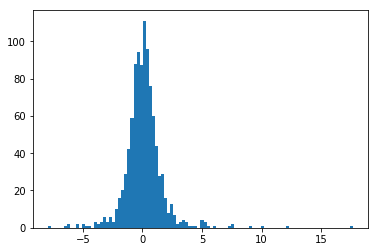

In [9]:
plt.hist((yhat - ytest), bins = 100)
plt.show()

In [13]:
start = time.time()
SHAP_Importance = np.empty(x.shape[1])
for Jf in range(x.shape[1]):
    SHAP_Importance[Jf] = FeatureImportance(x,Jf,1000,20,NN_model)
    print(Jf, SHAP_Importance[Jf])
end = time.time()
print(end-start)

0 0.12068336934372784
1 1.825175907202065
2 1.9516312058590353
3 0.1396089151330292
4 0.13877329022064805
5 0.12529899358749388
6 1.4932140651993455
7 0.14821992440894247
8 1.1277393376938998
9 1.1904436723969876
330.28630089759827


Indeed, only the true features have an importance > 1.

### Now SHAP-Self-Made with Interactions

In [30]:
def ChooseK2(P):# P is integer of Feature number
    K =np.random.beta(0.2, 0.2,1)
    K = 2 + (P-2)*K
    K = int(K)
    if K==P+1: # some degenerate cases
        K = K-1
    return(K)

2.0 20.0


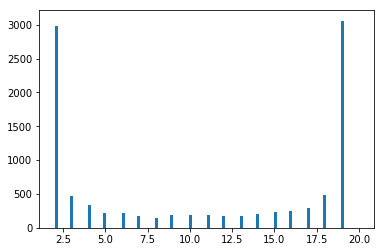

In [34]:
ks = np.empty(10000)
for i in range(10000):
    ks[i] = ChooseK2(20)
print(np.min(ks), np.max(ks))
plt.hist(ks,bins=100)
plt.show()




In [37]:
np.delete(3*np.arange(10),np.array([5,6]))

array([ 0,  3,  6,  9, 12, 21, 24, 27])

In [41]:
print(a)


[[0.56260982 0.47274089 0.56375288 0.1285995  0.96333067 0.00897687]
 [0.92072052 0.98728289 0.77799394 0.22973805 0.34481452 0.02946855]
 [0.45891265 0.93015527 0.23831911 0.13460192 0.79372421 0.79576342]
 [0.99828663 0.04840147 0.28070431 0.36151186 0.99840843 0.99098451]]


In [43]:
SwapFeaturesInt(a, 0, 1, 5,3, 4)

array([0.56260982, 0.47274089, 0.77799394, 0.22973805, 0.34481452,
       0.02946855])

In [49]:
CompareInt(x[0,:], x[1,:], x[2,:], x[3,:], NN_model)

array([[-27.428188]], dtype=float32)

In [112]:
def ChooseK2(P):# P is integer of Feature number
    K =np.random.beta(0.2, 0.2,1)
    K = 2 + (P-2)*K
    K = int(K)
    if K==P+1: # some degenerate cases
        K = K-1
    return(K)

def SwapFeaturesInt(X,i,m,j1, j2,k):  
    # take instance x_i, exchange k of its features randomly with the features of x_m including the jth Feature
    output = X[i,:].copy()
    output[j1] = X[m,j1].copy()
    output[j2] = X[m,j2].copy()
    
    if k == 2: # only change j1 and j2th Feature
        output[j1] = X[m,j1].copy()
        output[j2] = X[m,j2].copy()

    if k>2:  # also exchange some other features
        Selection = np.random.choice(np.delete(np.arange(X.shape[1]),np.array([j1,j2])),
                                     size=k-2, replace=False)
        
        output[Selection] = X[m,Selection].copy()
    
    return(output)


def CalcShapInt(X,i,j1, j2,M,Model):  
    global x_dummy_j2
    # Calculate Shap values for DataSet X for ith instance and jth feature with M iterations for AI-Model "Model"
    M_iter = 0 # iteration index
    SHAPValues = np.zeros(M)
    
    while M_iter<M:
        m = np.random.randint(X.shape[0]) # random instance to "mix" x_i with
    
        if m!=i:
            k = ChooseK2(X.shape[1])
            
            
            
            x_dummy_noj12 = SwapFeaturesInt(X, i, m, j1, j2, k)      # make sure that the dummy-instance has j1
                                                                         #   and j2 exchanged
                                     # then we add first j1, then j2 and finally j1 and j2 
                
            x_dummy_j1 = x_dummy_noj12.copy()
            x_dummy_j1[j1] = X[i, j1].copy()
            
            x_dummy_j2 = x_dummy_noj12.copy()
            x_dummy_j2[j2] = X[i, j2].copy()
            
            
            x_dummy_j12 = x_dummy_j2.copy()
            x_dummy_j12[j1] = X[i,j1].copy() # this has the original j1 and j2 values
        
            
            SHAPValues[M_iter] += Model.predict(x_dummy_noj12.reshape(1,-1))
            SHAPValues[M_iter] -= Model.predict(x_dummy_j1.reshape(1,-1))
            SHAPValues[M_iter] -= Model.predict(x_dummy_j2.reshape(1,-1))
            SHAPValues[M_iter] += Model.predict(x_dummy_j12.reshape(1,-1))
            M_iter = M_iter+1            
            
    return(np.mean(SHAPValues))

def InteractionImportance(X,j1,j2,M1,M2,Model):
    # Calculate Interaction Importanc over M1 instances for j1 and j2'th Feature of Data Set X,
    #   compare each instance M2 times and evaluate via Model
    
    Output = np.empty(M1)
    
    for m1 in range(M1):
        i = np.random.randint(X.shape[0])
        Output[m1] = np.abs(CalcShapInt(X,i,j1, j2,M2,Model))
        
    return(np.mean(Output))

In [113]:
NN_model.predict(x_dummy_j2.reshape(1,-1))

array([[2.535295]], dtype=float32)

In [119]:
for i in range(9):
    print(i,InteractionImportance(x,i,9,100,10,NN_model))

0 0.13417409758269785
1 0.23642745856940742
2 0.25089974382519725
3 0.13170702423155306
4 0.14361466103792192
5 0.11628427410125732
6 0.2314192214012146
7 0.13713262027502057
8 2.024088504612446


In [123]:
for i in np.delete(range(9),2):
    print(i,InteractionImportance(x,i,2,100,10,NN_model))    

0 0.10490216866135596
1 0.22823254086077213
3 0.11919768376648426
4 0.11934654016792776
5 0.1093558949381113
6 0.1943932704627514
7 0.12478142566978931
8 0.33860844366252424


## DGLs

Hypothese: wenn wir 3 Neuronale Netze im Lorenzsystem von
(x_1, x_2, x_3) -> d/dt (x_1, x_2, x_3) machen,
sieht man mit SHAP die Interaktionen der nichtlinearen Terme

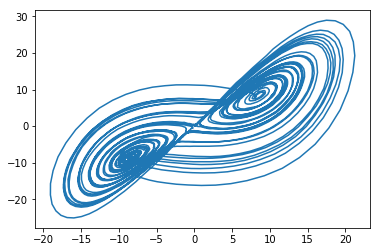

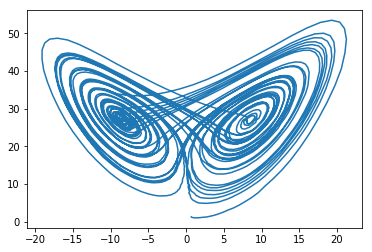

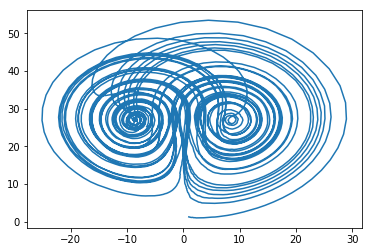

In [124]:
X = np.loadtxt("Lorenz5000_dt0.01.txt")

plt.plot(X[:,0], X[:,1])
plt.show()

plt.plot(X[:,0], X[:,2])
plt.show()

plt.plot(X[:,1], X[:,2])
plt.show()

In [125]:
print(X[0:(X.shape[0]-1),0])
print(X[1:,0])

[ 0.68740279  0.73084856  0.75877885 ... -6.88104749 -6.84861157
 -6.7888538 ]
[ 0.73084856  0.75877885  0.83716927 ... -6.84861157 -6.7888538
 -6.72797166]


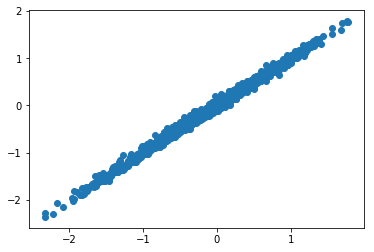

In [126]:
# Derivatives
dX0dt = np.gradient(X[:,0])
dX1dt = np.gradient(X[:,1])
dX2dt = np.gradient(X[:,2])


plt.scatter(dX0dt[1:],  X[1:,0] - X[0:(X.shape[0]-1),0])
plt.show() # looks good

### X0

In [127]:
NN0 = Sequential()

# The Input Layer :
NN0.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN0.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN0.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN0.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN0.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN0.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN0.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN0.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 231,169
Trainable params: 231,169
Non-trainable params: 0
________________________________________________

In [128]:
X0_train, X0_test, y0_train, y0_test = sklearn.model_selection.train_test_split(X, dX0dt, test_size=0.33,
                                                                                random_state=42)

In [129]:
NN0.fit(X0_train, y0_train, epochs=500, batch_size=32, validation_split = 0.5)

Train on 1675 samples, validate on 1675 samples
Epoch 1/500
1675/1675 [==============================] - 0s 120us/sample - loss: 0.1026 - mean_absolute_error: 0.1026 - val_loss: 0.0552 - val_mean_absolute_error: 0.0552
Epoch 2/500
1675/1675 [==============================] - 0s 65us/sample - loss: 0.0505 - mean_absolute_error: 0.0505 - val_loss: 0.0425 - val_mean_absolute_error: 0.0425
Epoch 3/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0354 - mean_absolute_error: 0.0354 - val_loss: 0.0357 - val_mean_absolute_error: 0.0357
Epoch 4/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0337 - mean_absolute_error: 0.0337 - val_loss: 0.0351 - val_mean_absolute_error: 0.0351
Epoch 5/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0333 - mean_absolute_error: 0.0333 - val_loss: 0.0280 - val_mean_absolute_error: 0.0280
Epoch 6/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0303 - mean_absolut

Epoch 49/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0272 - mean_absolute_error: 0.0272 - val_loss: 0.0302 - val_mean_absolute_error: 0.0302
Epoch 50/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0268 - mean_absolute_error: 0.0268 - val_loss: 0.0290 - val_mean_absolute_error: 0.0290
Epoch 51/500
1675/1675 [==============================] - 0s 64us/sample - loss: 0.0249 - mean_absolute_error: 0.0249 - val_loss: 0.0228 - val_mean_absolute_error: 0.0228
Epoch 52/500
1675/1675 [==============================] - 0s 68us/sample - loss: 0.0243 - mean_absolute_error: 0.0243 - val_loss: 0.0229 - val_mean_absolute_error: 0.0229
Epoch 53/500
1675/1675 [==============================] - 0s 71us/sample - loss: 0.0231 - mean_absolute_error: 0.0231 - val_loss: 0.0305 - val_mean_absolute_error: 0.0305
Epoch 54/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0241 - mean_absolute_error: 0.0241 - val_loss: 0.0252 - val_me

Epoch 97/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0226 - mean_absolute_error: 0.0226 - val_loss: 0.0226 - val_mean_absolute_error: 0.0226
Epoch 98/500
1675/1675 [==============================] - 0s 59us/sample - loss: 0.0220 - mean_absolute_error: 0.0220 - val_loss: 0.0243 - val_mean_absolute_error: 0.0243
Epoch 99/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0231 - mean_absolute_error: 0.0231 - val_loss: 0.0246 - val_mean_absolute_error: 0.0246
Epoch 100/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0240 - mean_absolute_error: 0.0240 - val_loss: 0.0215 - val_mean_absolute_error: 0.0215
Epoch 101/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0210 - mean_absolute_error: 0.0210 - val_loss: 0.0232 - val_mean_absolute_error: 0.0232
Epoch 102/500
1675/1675 [==============================] - 0s 60us/sample - loss: 0.0242 - mean_absolute_error: 0.0242 - val_loss: 0.0223 - val

Epoch 145/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0235 - mean_absolute_error: 0.0235 - val_loss: 0.0227 - val_mean_absolute_error: 0.0227
Epoch 146/500
1675/1675 [==============================] - 0s 60us/sample - loss: 0.0222 - mean_absolute_error: 0.0222 - val_loss: 0.0224 - val_mean_absolute_error: 0.0224
Epoch 147/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0211 - mean_absolute_error: 0.0211 - val_loss: 0.0259 - val_mean_absolute_error: 0.0259
Epoch 148/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0221 - mean_absolute_error: 0.0221 - val_loss: 0.0243 - val_mean_absolute_error: 0.0243
Epoch 149/500
1675/1675 [==============================] - 0s 60us/sample - loss: 0.0236 - mean_absolute_error: 0.0236 - val_loss: 0.0260 - val_mean_absolute_error: 0.0260
Epoch 150/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0237 - mean_absolute_error: 0.0237 - val_loss: 0.0256 - 

1675/1675 [==============================] - 0s 62us/sample - loss: 0.0220 - mean_absolute_error: 0.0220 - val_loss: 0.0280 - val_mean_absolute_error: 0.0280
Epoch 193/500
1675/1675 [==============================] - 0s 60us/sample - loss: 0.0219 - mean_absolute_error: 0.0219 - val_loss: 0.0241 - val_mean_absolute_error: 0.0241
Epoch 194/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0225 - mean_absolute_error: 0.0225 - val_loss: 0.0244 - val_mean_absolute_error: 0.0244
Epoch 195/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0229 - mean_absolute_error: 0.0229 - val_loss: 0.0261 - val_mean_absolute_error: 0.0261
Epoch 196/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0211 - mean_absolute_error: 0.0211 - val_loss: 0.0226 - val_mean_absolute_error: 0.0226
Epoch 197/500
1675/1675 [==============================] - 0s 60us/sample - loss: 0.0221 - mean_absolute_error: 0.0221 - val_loss: 0.0269 - val_mean_absol

Epoch 240/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0212 - mean_absolute_error: 0.0212 - val_loss: 0.0324 - val_mean_absolute_error: 0.0324
Epoch 241/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0259 - mean_absolute_error: 0.0259 - val_loss: 0.0238 - val_mean_absolute_error: 0.0238
Epoch 242/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0208 - mean_absolute_error: 0.0208 - val_loss: 0.0226 - val_mean_absolute_error: 0.0226
Epoch 243/500
1675/1675 [==============================] - 0s 64us/sample - loss: 0.0207 - mean_absolute_error: 0.0207 - val_loss: 0.0223 - val_mean_absolute_error: 0.0223
Epoch 244/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0237 - mean_absolute_error: 0.0237 - val_loss: 0.0254 - val_mean_absolute_error: 0.0254
Epoch 245/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0216 - mean_absolute_error: 0.0216 - val_loss: 0.0212 - 

1675/1675 [==============================] - 0s 63us/sample - loss: 0.0221 - mean_absolute_error: 0.0221 - val_loss: 0.0260 - val_mean_absolute_error: 0.0260
Epoch 288/500
1675/1675 [==============================] - 0s 64us/sample - loss: 0.0233 - mean_absolute_error: 0.0233 - val_loss: 0.0228 - val_mean_absolute_error: 0.0228
Epoch 289/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0212 - mean_absolute_error: 0.0212 - val_loss: 0.0224 - val_mean_absolute_error: 0.0224
Epoch 290/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0200 - mean_absolute_error: 0.0200 - val_loss: 0.0244 - val_mean_absolute_error: 0.0244
Epoch 291/500
1675/1675 [==============================] - 0s 66us/sample - loss: 0.0213 - mean_absolute_error: 0.0213 - val_loss: 0.0248 - val_mean_absolute_error: 0.0248
Epoch 292/500
1675/1675 [==============================] - 0s 67us/sample - loss: 0.0210 - mean_absolute_error: 0.0210 - val_loss: 0.0221 - val_mean_absol

Epoch 335/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0212 - mean_absolute_error: 0.0212 - val_loss: 0.0212 - val_mean_absolute_error: 0.0212
Epoch 336/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0198 - mean_absolute_error: 0.0198 - val_loss: 0.0216 - val_mean_absolute_error: 0.0216
Epoch 337/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0208 - mean_absolute_error: 0.0208 - val_loss: 0.0227 - val_mean_absolute_error: 0.0227
Epoch 338/500
1675/1675 [==============================] - 0s 65us/sample - loss: 0.0212 - mean_absolute_error: 0.0212 - val_loss: 0.0213 - val_mean_absolute_error: 0.0213
Epoch 339/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0199 - mean_absolute_error: 0.0199 - val_loss: 0.0232 - val_mean_absolute_error: 0.0232
Epoch 340/500
1675/1675 [==============================] - 0s 64us/sample - loss: 0.0203 - mean_absolute_error: 0.0203 - val_loss: 0.0228 - 

1675/1675 [==============================] - 0s 63us/sample - loss: 0.0193 - mean_absolute_error: 0.0193 - val_loss: 0.0222 - val_mean_absolute_error: 0.0222
Epoch 383/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0215 - mean_absolute_error: 0.0215 - val_loss: 0.0223 - val_mean_absolute_error: 0.0223
Epoch 384/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0202 - mean_absolute_error: 0.0202 - val_loss: 0.0209 - val_mean_absolute_error: 0.0209
Epoch 385/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0190 - mean_absolute_error: 0.0190 - val_loss: 0.0213 - val_mean_absolute_error: 0.0213
Epoch 386/500
1675/1675 [==============================] - 0s 67us/sample - loss: 0.0196 - mean_absolute_error: 0.0196 - val_loss: 0.0207 - val_mean_absolute_error: 0.0207
Epoch 387/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0203 - mean_absolute_error: 0.0203 - val_loss: 0.0207 - val_mean_absol

Epoch 430/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0191 - mean_absolute_error: 0.0191 - val_loss: 0.0226 - val_mean_absolute_error: 0.0226
Epoch 431/500
1675/1675 [==============================] - 0s 65us/sample - loss: 0.0193 - mean_absolute_error: 0.0193 - val_loss: 0.0216 - val_mean_absolute_error: 0.0216
Epoch 432/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0196 - mean_absolute_error: 0.0196 - val_loss: 0.0218 - val_mean_absolute_error: 0.0218
Epoch 433/500
1675/1675 [==============================] - 0s 60us/sample - loss: 0.0189 - mean_absolute_error: 0.0189 - val_loss: 0.0223 - val_mean_absolute_error: 0.0223
Epoch 434/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0198 - mean_absolute_error: 0.0198 - val_loss: 0.0219 - val_mean_absolute_error: 0.0219
Epoch 435/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0197 - mean_absolute_error: 0.0197 - val_loss: 0.0219 - 

1675/1675 [==============================] - 0s 61us/sample - loss: 0.0191 - mean_absolute_error: 0.0191 - val_loss: 0.0222 - val_mean_absolute_error: 0.0222
Epoch 478/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0204 - mean_absolute_error: 0.0204 - val_loss: 0.0229 - val_mean_absolute_error: 0.0229
Epoch 479/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0197 - mean_absolute_error: 0.0197 - val_loss: 0.0213 - val_mean_absolute_error: 0.0213
Epoch 480/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0197 - mean_absolute_error: 0.0197 - val_loss: 0.0214 - val_mean_absolute_error: 0.0214
Epoch 481/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0197 - mean_absolute_error: 0.0197 - val_loss: 0.0233 - val_mean_absolute_error: 0.0233
Epoch 482/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0214 - mean_absolute_error: 0.0214 - val_loss: 0.0243 - val_mean_absol

In [130]:
y0hat = NN0.predict(X0_test)
y0hat = y0hat.ravel() # else problem with dimensions

print(np.mean((y0hat - y0_test)**2.))

0.0006582038302194967


### X1

In [131]:
NN1 = Sequential()

# The Input Layer :
NN1.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN1.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN1.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN1.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN1.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN1.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN1.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN1.summary()

X1_train, X1_test, y1_train, y1_test = sklearn.model_selection.train_test_split(X, dX1dt, test_size=0.33,
                                                                                random_state=42)

NN1.fit(X1_train, y1_train, epochs=500, batch_size=32, validation_split = 0.5)
y1hat = NN1.predict(X1_test)
y1hat = y1hat.ravel() # else problem with dimensions


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 257       
Total params: 231,169
Trainable params: 231,169
Non-trainable params: 0
________________________________________________

Epoch 42/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0517 - mean_absolute_error: 0.0517 - val_loss: 0.0491 - val_mean_absolute_error: 0.0491
Epoch 43/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0464 - mean_absolute_error: 0.0464 - val_loss: 0.0614 - val_mean_absolute_error: 0.0614
Epoch 44/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0512 - mean_absolute_error: 0.0512 - val_loss: 0.0512 - val_mean_absolute_error: 0.0512
Epoch 45/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0440 - mean_absolute_error: 0.0440 - val_loss: 0.0545 - val_mean_absolute_error: 0.0545
Epoch 46/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0474 - mean_absolute_error: 0.0474 - val_loss: 0.0426 - val_mean_absolute_error: 0.0426
Epoch 47/500
1675/1675 [==============================] - 0s 66us/sample - loss: 0.0514 - mean_absolute_error: 0.0514 - val_loss: 0.0474 - val_me

Epoch 90/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0422 - mean_absolute_error: 0.0422 - val_loss: 0.0406 - val_mean_absolute_error: 0.0406
Epoch 91/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0389 - mean_absolute_error: 0.0389 - val_loss: 0.0459 - val_mean_absolute_error: 0.0459
Epoch 92/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0364 - mean_absolute_error: 0.0364 - val_loss: 0.0324 - val_mean_absolute_error: 0.0324
Epoch 93/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0453 - mean_absolute_error: 0.0453 - val_loss: 0.0573 - val_mean_absolute_error: 0.0573
Epoch 94/500
1675/1675 [==============================] - 0s 64us/sample - loss: 0.0409 - mean_absolute_error: 0.0409 - val_loss: 0.0400 - val_mean_absolute_error: 0.0400
Epoch 95/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0421 - mean_absolute_error: 0.0421 - val_loss: 0.0572 - val_me

Epoch 138/500
1675/1675 [==============================] - 0s 64us/sample - loss: 0.0337 - mean_absolute_error: 0.0337 - val_loss: 0.0422 - val_mean_absolute_error: 0.0422
Epoch 139/500
1675/1675 [==============================] - 0s 65us/sample - loss: 0.0389 - mean_absolute_error: 0.0389 - val_loss: 0.0418 - val_mean_absolute_error: 0.0418
Epoch 140/500
1675/1675 [==============================] - 0s 65us/sample - loss: 0.0347 - mean_absolute_error: 0.0347 - val_loss: 0.0453 - val_mean_absolute_error: 0.0453
Epoch 141/500
1675/1675 [==============================] - 0s 60us/sample - loss: 0.0361 - mean_absolute_error: 0.0361 - val_loss: 0.0383 - val_mean_absolute_error: 0.0383
Epoch 142/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0341 - mean_absolute_error: 0.0341 - val_loss: 0.0377 - val_mean_absolute_error: 0.0377
Epoch 143/500
1675/1675 [==============================] - 0s 64us/sample - loss: 0.0304 - mean_absolute_error: 0.0304 - val_loss: 0.0335 - 

1675/1675 [==============================] - 0s 62us/sample - loss: 0.0320 - mean_absolute_error: 0.0320 - val_loss: 0.0334 - val_mean_absolute_error: 0.0334
Epoch 186/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0343 - mean_absolute_error: 0.0343 - val_loss: 0.0362 - val_mean_absolute_error: 0.0362
Epoch 187/500
1675/1675 [==============================] - 0s 66us/sample - loss: 0.0388 - mean_absolute_error: 0.0388 - val_loss: 0.0425 - val_mean_absolute_error: 0.0425
Epoch 188/500
1675/1675 [==============================] - 0s 70us/sample - loss: 0.0326 - mean_absolute_error: 0.0326 - val_loss: 0.0314 - val_mean_absolute_error: 0.0314
Epoch 189/500
1675/1675 [==============================] - 0s 66us/sample - loss: 0.0381 - mean_absolute_error: 0.0381 - val_loss: 0.0418 - val_mean_absolute_error: 0.0418
Epoch 190/500
1675/1675 [==============================] - 0s 65us/sample - loss: 0.0285 - mean_absolute_error: 0.0285 - val_loss: 0.0374 - val_mean_absol

Epoch 233/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0315 - mean_absolute_error: 0.0315 - val_loss: 0.0277 - val_mean_absolute_error: 0.0277
Epoch 234/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0363 - mean_absolute_error: 0.0363 - val_loss: 0.0389 - val_mean_absolute_error: 0.0389
Epoch 235/500
1675/1675 [==============================] - 0s 65us/sample - loss: 0.0324 - mean_absolute_error: 0.0324 - val_loss: 0.0266 - val_mean_absolute_error: 0.0266
Epoch 236/500
1675/1675 [==============================] - 0s 64us/sample - loss: 0.0290 - mean_absolute_error: 0.0290 - val_loss: 0.0278 - val_mean_absolute_error: 0.0278
Epoch 237/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0333 - mean_absolute_error: 0.0333 - val_loss: 0.0281 - val_mean_absolute_error: 0.0281
Epoch 238/500
1675/1675 [==============================] - 0s 64us/sample - loss: 0.0297 - mean_absolute_error: 0.0297 - val_loss: 0.0330 - 

1675/1675 [==============================] - 0s 63us/sample - loss: 0.0258 - mean_absolute_error: 0.0258 - val_loss: 0.0281 - val_mean_absolute_error: 0.0281
Epoch 281/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0277 - mean_absolute_error: 0.0277 - val_loss: 0.0293 - val_mean_absolute_error: 0.0293
Epoch 282/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0253 - mean_absolute_error: 0.0253 - val_loss: 0.0290 - val_mean_absolute_error: 0.0290
Epoch 283/500
1675/1675 [==============================] - 0s 65us/sample - loss: 0.0288 - mean_absolute_error: 0.0288 - val_loss: 0.0255 - val_mean_absolute_error: 0.0255
Epoch 284/500
1675/1675 [==============================] - 0s 64us/sample - loss: 0.0290 - mean_absolute_error: 0.0290 - val_loss: 0.0258 - val_mean_absolute_error: 0.0258
Epoch 285/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0351 - mean_absolute_error: 0.0351 - val_loss: 0.0356 - val_mean_absol

Epoch 328/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0268 - mean_absolute_error: 0.0268 - val_loss: 0.0285 - val_mean_absolute_error: 0.0285
Epoch 329/500
1675/1675 [==============================] - 0s 64us/sample - loss: 0.0280 - mean_absolute_error: 0.0280 - val_loss: 0.0293 - val_mean_absolute_error: 0.0293
Epoch 330/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0247 - mean_absolute_error: 0.0247 - val_loss: 0.0258 - val_mean_absolute_error: 0.0258
Epoch 331/500
1675/1675 [==============================] - 0s 64us/sample - loss: 0.0262 - mean_absolute_error: 0.0262 - val_loss: 0.0365 - val_mean_absolute_error: 0.0365
Epoch 332/500
1675/1675 [==============================] - 0s 64us/sample - loss: 0.0249 - mean_absolute_error: 0.0249 - val_loss: 0.0304 - val_mean_absolute_error: 0.0304
Epoch 333/500
1675/1675 [==============================] - 0s 64us/sample - loss: 0.0277 - mean_absolute_error: 0.0277 - val_loss: 0.0275 - 

1675/1675 [==============================] - 0s 71us/sample - loss: 0.0244 - mean_absolute_error: 0.0244 - val_loss: 0.0250 - val_mean_absolute_error: 0.0250
Epoch 376/500
1675/1675 [==============================] - 0s 68us/sample - loss: 0.0288 - mean_absolute_error: 0.0288 - val_loss: 0.0282 - val_mean_absolute_error: 0.0282
Epoch 377/500
1675/1675 [==============================] - 0s 66us/sample - loss: 0.0255 - mean_absolute_error: 0.0255 - val_loss: 0.0271 - val_mean_absolute_error: 0.0271
Epoch 378/500
1675/1675 [==============================] - 0s 65us/sample - loss: 0.0249 - mean_absolute_error: 0.0249 - val_loss: 0.0283 - val_mean_absolute_error: 0.0283
Epoch 379/500
1675/1675 [==============================] - 0s 67us/sample - loss: 0.0262 - mean_absolute_error: 0.0262 - val_loss: 0.0264 - val_mean_absolute_error: 0.0264
Epoch 380/500
1675/1675 [==============================] - 0s 68us/sample - loss: 0.0261 - mean_absolute_error: 0.0261 - val_loss: 0.0243 - val_mean_absol

Epoch 423/500
1675/1675 [==============================] - 0s 64us/sample - loss: 0.0330 - mean_absolute_error: 0.0330 - val_loss: 0.0440 - val_mean_absolute_error: 0.0440
Epoch 424/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0286 - mean_absolute_error: 0.0286 - val_loss: 0.0257 - val_mean_absolute_error: 0.0257
Epoch 425/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0260 - mean_absolute_error: 0.0260 - val_loss: 0.0317 - val_mean_absolute_error: 0.0317
Epoch 426/500
1675/1675 [==============================] - 0s 68us/sample - loss: 0.0265 - mean_absolute_error: 0.0265 - val_loss: 0.0274 - val_mean_absolute_error: 0.0274
Epoch 427/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0251 - mean_absolute_error: 0.0251 - val_loss: 0.0233 - val_mean_absolute_error: 0.0233
Epoch 428/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0259 - mean_absolute_error: 0.0259 - val_loss: 0.0295 - 

1675/1675 [==============================] - 0s 67us/sample - loss: 0.0250 - mean_absolute_error: 0.0250 - val_loss: 0.0240 - val_mean_absolute_error: 0.0240
Epoch 471/500
1675/1675 [==============================] - 0s 64us/sample - loss: 0.0236 - mean_absolute_error: 0.0236 - val_loss: 0.0262 - val_mean_absolute_error: 0.0262
Epoch 472/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0248 - mean_absolute_error: 0.0248 - val_loss: 0.0355 - val_mean_absolute_error: 0.0355
Epoch 473/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0264 - mean_absolute_error: 0.0264 - val_loss: 0.0273 - val_mean_absolute_error: 0.0273
Epoch 474/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0242 - mean_absolute_error: 0.0242 - val_loss: 0.0243 - val_mean_absolute_error: 0.0243
Epoch 475/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0229 - mean_absolute_error: 0.0229 - val_loss: 0.0244 - val_mean_absol

In [132]:
print(np.mean((y1hat - y1_test)**2.))

0.0014582601887706199


## X2

In [133]:
NN2 = Sequential()

# The Input Layer :
NN2.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN2.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN2.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN2.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN2.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN2.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN2.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN2.summary()

X2_train, X2_test, y2_train, y2_test = sklearn.model_selection.train_test_split(X, dX2dt, test_size=0.33,
                                                                                random_state=42)

NN2.fit(X2_train, y2_train, epochs=500, batch_size=32, validation_split = 0.5)
y2hat = NN2.predict(X1_test)
y2hat = y2hat.ravel() # else problem with dimensions


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_18 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_20 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_21 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 257       
Total params: 231,169
Trainable params: 231,169
Non-trainable params: 0
________________________________________________

Epoch 42/500
1675/1675 [==============================] - 0s 76us/sample - loss: 0.0383 - mean_absolute_error: 0.0383 - val_loss: 0.0539 - val_mean_absolute_error: 0.0539
Epoch 43/500
1675/1675 [==============================] - 0s 75us/sample - loss: 0.0446 - mean_absolute_error: 0.0446 - val_loss: 0.0384 - val_mean_absolute_error: 0.0384
Epoch 44/500
1675/1675 [==============================] - 0s 76us/sample - loss: 0.0343 - mean_absolute_error: 0.0343 - val_loss: 0.0566 - val_mean_absolute_error: 0.0566
Epoch 45/500
1675/1675 [==============================] - 0s 76us/sample - loss: 0.0449 - mean_absolute_error: 0.0449 - val_loss: 0.0458 - val_mean_absolute_error: 0.0458
Epoch 46/500
1675/1675 [==============================] - 0s 71us/sample - loss: 0.0392 - mean_absolute_error: 0.0392 - val_loss: 0.0439 - val_mean_absolute_error: 0.0439
Epoch 47/500
1675/1675 [==============================] - 0s 69us/sample - loss: 0.0366 - mean_absolute_error: 0.0366 - val_loss: 0.0433 - val_me

Epoch 90/500
1675/1675 [==============================] - 0s 70us/sample - loss: 0.0316 - mean_absolute_error: 0.0316 - val_loss: 0.0262 - val_mean_absolute_error: 0.0262
Epoch 91/500
1675/1675 [==============================] - 0s 70us/sample - loss: 0.0326 - mean_absolute_error: 0.0326 - val_loss: 0.0344 - val_mean_absolute_error: 0.0344
Epoch 92/500
1675/1675 [==============================] - 0s 67us/sample - loss: 0.0344 - mean_absolute_error: 0.0344 - val_loss: 0.0450 - val_mean_absolute_error: 0.0450
Epoch 93/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0404 - mean_absolute_error: 0.0404 - val_loss: 0.0294 - val_mean_absolute_error: 0.0294
Epoch 94/500
1675/1675 [==============================] - 0s 65us/sample - loss: 0.0318 - mean_absolute_error: 0.0318 - val_loss: 0.0276 - val_mean_absolute_error: 0.0276
Epoch 95/500
1675/1675 [==============================] - 0s 65us/sample - loss: 0.0378 - mean_absolute_error: 0.0378 - val_loss: 0.0366 - val_me

Epoch 138/500
1675/1675 [==============================] - 0s 70us/sample - loss: 0.0384 - mean_absolute_error: 0.0384 - val_loss: 0.0416 - val_mean_absolute_error: 0.0416
Epoch 139/500
1675/1675 [==============================] - 0s 65us/sample - loss: 0.0370 - mean_absolute_error: 0.0370 - val_loss: 0.0335 - val_mean_absolute_error: 0.0335
Epoch 140/500
1675/1675 [==============================] - 0s 66us/sample - loss: 0.0290 - mean_absolute_error: 0.0290 - val_loss: 0.0297 - val_mean_absolute_error: 0.0297
Epoch 141/500
1675/1675 [==============================] - 0s 66us/sample - loss: 0.0288 - mean_absolute_error: 0.0288 - val_loss: 0.0316 - val_mean_absolute_error: 0.0316
Epoch 142/500
1675/1675 [==============================] - 0s 65us/sample - loss: 0.0331 - mean_absolute_error: 0.0331 - val_loss: 0.0302 - val_mean_absolute_error: 0.0302
Epoch 143/500
1675/1675 [==============================] - 0s 66us/sample - loss: 0.0293 - mean_absolute_error: 0.0293 - val_loss: 0.0319 - 

1675/1675 [==============================] - 0s 72us/sample - loss: 0.0356 - mean_absolute_error: 0.0356 - val_loss: 0.0242 - val_mean_absolute_error: 0.0242
Epoch 186/500
1675/1675 [==============================] - 0s 66us/sample - loss: 0.0260 - mean_absolute_error: 0.0260 - val_loss: 0.0381 - val_mean_absolute_error: 0.0381
Epoch 187/500
1675/1675 [==============================] - 0s 64us/sample - loss: 0.0324 - mean_absolute_error: 0.0324 - val_loss: 0.0337 - val_mean_absolute_error: 0.0337
Epoch 188/500
1675/1675 [==============================] - 0s 67us/sample - loss: 0.0257 - mean_absolute_error: 0.0257 - val_loss: 0.0288 - val_mean_absolute_error: 0.0288
Epoch 189/500
1675/1675 [==============================] - 0s 71us/sample - loss: 0.0278 - mean_absolute_error: 0.0278 - val_loss: 0.0292 - val_mean_absolute_error: 0.0292
Epoch 190/500
1675/1675 [==============================] - 0s 69us/sample - loss: 0.0299 - mean_absolute_error: 0.0299 - val_loss: 0.0383 - val_mean_absol

Epoch 233/500
1675/1675 [==============================] - 0s 66us/sample - loss: 0.0242 - mean_absolute_error: 0.0242 - val_loss: 0.0336 - val_mean_absolute_error: 0.0336
Epoch 234/500
1675/1675 [==============================] - 0s 64us/sample - loss: 0.0271 - mean_absolute_error: 0.0271 - val_loss: 0.0271 - val_mean_absolute_error: 0.0271
Epoch 235/500
1675/1675 [==============================] - 0s 66us/sample - loss: 0.0260 - mean_absolute_error: 0.0260 - val_loss: 0.0270 - val_mean_absolute_error: 0.0270
Epoch 236/500
1675/1675 [==============================] - 0s 64us/sample - loss: 0.0305 - mean_absolute_error: 0.0305 - val_loss: 0.0365 - val_mean_absolute_error: 0.0365
Epoch 237/500
1675/1675 [==============================] - 0s 67us/sample - loss: 0.0288 - mean_absolute_error: 0.0288 - val_loss: 0.0476 - val_mean_absolute_error: 0.0476
Epoch 238/500
1675/1675 [==============================] - 0s 67us/sample - loss: 0.0336 - mean_absolute_error: 0.0336 - val_loss: 0.0328 - 

1675/1675 [==============================] - 0s 69us/sample - loss: 0.0240 - mean_absolute_error: 0.0240 - val_loss: 0.0229 - val_mean_absolute_error: 0.0229
Epoch 281/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0225 - mean_absolute_error: 0.0225 - val_loss: 0.0383 - val_mean_absolute_error: 0.0383
Epoch 282/500
1675/1675 [==============================] - 0s 65us/sample - loss: 0.0250 - mean_absolute_error: 0.0250 - val_loss: 0.0295 - val_mean_absolute_error: 0.0295
Epoch 283/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0228 - mean_absolute_error: 0.0228 - val_loss: 0.0222 - val_mean_absolute_error: 0.0222
Epoch 284/500
1675/1675 [==============================] - 0s 64us/sample - loss: 0.0271 - mean_absolute_error: 0.0271 - val_loss: 0.0244 - val_mean_absolute_error: 0.0244
Epoch 285/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0239 - mean_absolute_error: 0.0239 - val_loss: 0.0312 - val_mean_absol

Epoch 328/500
1675/1675 [==============================] - 0s 66us/sample - loss: 0.0233 - mean_absolute_error: 0.0233 - val_loss: 0.0241 - val_mean_absolute_error: 0.0241
Epoch 329/500
1675/1675 [==============================] - 0s 64us/sample - loss: 0.0235 - mean_absolute_error: 0.0235 - val_loss: 0.0263 - val_mean_absolute_error: 0.0263
Epoch 330/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0229 - mean_absolute_error: 0.0229 - val_loss: 0.0252 - val_mean_absolute_error: 0.0252
Epoch 331/500
1675/1675 [==============================] - 0s 66us/sample - loss: 0.0217 - mean_absolute_error: 0.0217 - val_loss: 0.0245 - val_mean_absolute_error: 0.0245
Epoch 332/500
1675/1675 [==============================] - 0s 65us/sample - loss: 0.0267 - mean_absolute_error: 0.0267 - val_loss: 0.0281 - val_mean_absolute_error: 0.0281
Epoch 333/500
1675/1675 [==============================] - 0s 65us/sample - loss: 0.0231 - mean_absolute_error: 0.0231 - val_loss: 0.0334 - 

1675/1675 [==============================] - 0s 71us/sample - loss: 0.0247 - mean_absolute_error: 0.0247 - val_loss: 0.0279 - val_mean_absolute_error: 0.0279
Epoch 376/500
1675/1675 [==============================] - 0s 72us/sample - loss: 0.0238 - mean_absolute_error: 0.0238 - val_loss: 0.0316 - val_mean_absolute_error: 0.0316
Epoch 377/500
1675/1675 [==============================] - 0s 69us/sample - loss: 0.0273 - mean_absolute_error: 0.0273 - val_loss: 0.0255 - val_mean_absolute_error: 0.0255
Epoch 378/500
1675/1675 [==============================] - 0s 66us/sample - loss: 0.0235 - mean_absolute_error: 0.0235 - val_loss: 0.0245 - val_mean_absolute_error: 0.0245
Epoch 379/500
1675/1675 [==============================] - 0s 66us/sample - loss: 0.0238 - mean_absolute_error: 0.0238 - val_loss: 0.0290 - val_mean_absolute_error: 0.0290
Epoch 380/500
1675/1675 [==============================] - 0s 65us/sample - loss: 0.0253 - mean_absolute_error: 0.0253 - val_loss: 0.0212 - val_mean_absol

Epoch 423/500
1675/1675 [==============================] - 0s 64us/sample - loss: 0.0218 - mean_absolute_error: 0.0218 - val_loss: 0.0289 - val_mean_absolute_error: 0.0289
Epoch 424/500
1675/1675 [==============================] - 0s 66us/sample - loss: 0.0237 - mean_absolute_error: 0.0237 - val_loss: 0.0247 - val_mean_absolute_error: 0.0247
Epoch 425/500
1675/1675 [==============================] - 0s 65us/sample - loss: 0.0241 - mean_absolute_error: 0.0241 - val_loss: 0.0251 - val_mean_absolute_error: 0.0251
Epoch 426/500
1675/1675 [==============================] - 0s 69us/sample - loss: 0.0224 - mean_absolute_error: 0.0224 - val_loss: 0.0230 - val_mean_absolute_error: 0.0230
Epoch 427/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0210 - mean_absolute_error: 0.0210 - val_loss: 0.0321 - val_mean_absolute_error: 0.0321
Epoch 428/500
1675/1675 [==============================] - 0s 66us/sample - loss: 0.0240 - mean_absolute_error: 0.0240 - val_loss: 0.0245 - 

1675/1675 [==============================] - 0s 62us/sample - loss: 0.0237 - mean_absolute_error: 0.0237 - val_loss: 0.0222 - val_mean_absolute_error: 0.0222
Epoch 471/500
1675/1675 [==============================] - 0s 65us/sample - loss: 0.0213 - mean_absolute_error: 0.0213 - val_loss: 0.0314 - val_mean_absolute_error: 0.0314
Epoch 472/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0286 - mean_absolute_error: 0.0286 - val_loss: 0.0288 - val_mean_absolute_error: 0.0288
Epoch 473/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0239 - mean_absolute_error: 0.0239 - val_loss: 0.0240 - val_mean_absolute_error: 0.0240
Epoch 474/500
1675/1675 [==============================] - 0s 65us/sample - loss: 0.0274 - mean_absolute_error: 0.0274 - val_loss: 0.0291 - val_mean_absolute_error: 0.0291
Epoch 475/500
1675/1675 [==============================] - 0s 64us/sample - loss: 0.0265 - mean_absolute_error: 0.0265 - val_loss: 0.0257 - val_mean_absol

In [134]:
print(np.mean((y1hat - y1_test)**2.))

0.0014582601887706199


## Evaluate Goodness-of-Fit

In [135]:
dt = 0.01
X0hat = np.zeros(X.shape[0])
X0hat[0] = X[0,0]
X1hat = np.zeros(X.shape[0])
X1hat[0] = X[0,1]
dx0 = NN0.predict(X)
dx1 = NN1.predict(X)

for i in range(len(X0hat)-1):
    X0hat[i+1] = X0hat[i] + dt*dx0[i] 
    X1hat[i+1] = X1hat[i] + dt*dx1[i] 
    

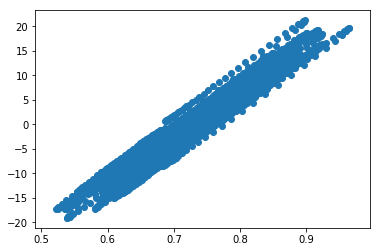

In [136]:
plt.scatter(X0hat, X[:,0])
plt.show()

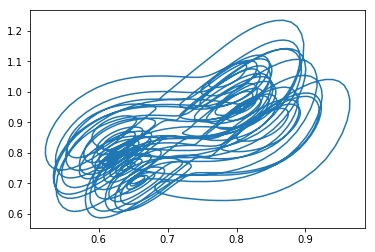

In [137]:
# probably not useful for forward-integration
plt.plot(X0hat, X1hat)
plt.show()

# Question: when exactly does the trajectory "jump"?

## Self-made SHAP code

In [140]:
# For the entire Data Set and 0th component
start = time.time()
SHAP_Importance = np.empty(X.shape[1])
for Jf in range(X.shape[1]):
    SHAP_Importance[Jf] = FeatureImportance(X,Jf,1000,20,NN0)
    print(Jf, SHAP_Importance[Jf])
end = time.time()
print(end-start)

0 0.654359466555086
1 0.7478059053041972
2 0.019726648496475534
110.94440841674805


Correctly shows that the Lorenz-Systems dx0/dt only depends on x0 and x1 :)

In [141]:
# For the entire Data Set and 1st component
SHAP_Importance = np.empty(X.shape[1])
for Jf in range(X.shape[1]):
    SHAP_Importance[Jf] = FeatureImportance(X,Jf,1000,20,NN1)
    print(Jf, SHAP_Importance[Jf])

0 0.5020930836495944
1 0.4185483230629238
2 0.12830608386751266


For dx1/dt, the pseudo-SHAP correctly shows that all features contribute in the same order of magnitude.

In [142]:
# For the entire Data Set and 2nd component
SHAP_Importance = np.empty(X.shape[1])
for Jf in range(X.shape[1]):
    SHAP_Importance[Jf] = FeatureImportance(X,Jf,1000,20,NN2)
    print(Jf, SHAP_Importance[Jf])

0 0.4346338481204584
1 0.2980606578405946
2 0.17773278266657144


Again, all features are in the same order of magnitude as it should be

## And Self-made SHAP Interactions

In [157]:
# NN0
print(InteractionImportance(X,0,1,100,50,NN0)) 
print(InteractionImportance(X,0,2,100,50,NN0)) 
print(InteractionImportance(X,1,2,100,50,NN0)) 

0.045602631360199306
0.039563254782184955
0.023950874451640992


In [158]:
# NN1:
print(InteractionImportance(X,0,1,100,50,NN1)) 
print(InteractionImportance(X,0,2,100,50,NN1)) 
print(InteractionImportance(X,1,2,100,50,NN1))

0.2900917449159548
0.17870156531725084
0.08757807505568492


In [159]:
# NN2:
print(InteractionImportance(X,0,1,100,50,NN2)) 
print(InteractionImportance(X,0,2,100,50,NN2)) 
print(InteractionImportance(X,1,2,100,50,NN2)) 

1.510904868617654
0.06048793485537171
0.056554419352114194


At least it seems to accurately identify the x_0*x_1 interaction for dx_2/dt. However, for dx_1/dt, it does not manage to identify the x_0*x_2 interaction compared to the interpretation of the (nonexistent) x_0*x_1 interaction, but at least gives it a clearly nonzero effect. It correctly does not assign any meaningful interaction to the dx_0/dt components. The 

## Now try to predict the x_t+1 instead of the rhs dx/dt

In [28]:
Xt0 = X[0:(X.shape[0]-1):]
Xt1 = X[1:,:]

In [29]:
# Predict X0[t+1]

NNt0 = Sequential()

# The Input Layer :
NNt0.add(Dense(128, kernel_initializer='normal',input_dim = Xt0.shape[1], activation='relu'))

# The Hidden Layers :
NNt0.add(Dense(256, kernel_initializer='normal',activation='relu'))
NNt0.add(Dense(256, kernel_initializer='normal',activation='relu'))
NNt0.add(Dense(256, kernel_initializer='normal',activation='relu'))
NNt0.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NNt0.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NNt0.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NNt0.summary()

Xt_train, Xt_test, yt0_train, yt0_test = sklearn.model_selection.train_test_split(Xt0, Xt1[:,0], test_size=0.33,
                                                                                random_state=42)

NNt0.fit(Xt_train, yt0_train, epochs=500, batch_size=32, validation_split = 0.5)



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_24 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_25 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_26 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_27 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 257       
Total params: 231,169
Trainable params: 231,169
Non-trainable params: 0
________________________________________________

Epoch 42/500
1674/1674 [==============================] - 0s 80us/sample - loss: 0.1222 - mean_absolute_error: 0.1222 - val_loss: 0.1750 - val_mean_absolute_error: 0.1750
Epoch 43/500
1674/1674 [==============================] - 0s 73us/sample - loss: 0.1510 - mean_absolute_error: 0.1510 - val_loss: 0.1605 - val_mean_absolute_error: 0.1605
Epoch 44/500
1674/1674 [==============================] - 0s 70us/sample - loss: 0.1500 - mean_absolute_error: 0.1500 - val_loss: 0.1453 - val_mean_absolute_error: 0.1453
Epoch 45/500
1674/1674 [==============================] - 0s 70us/sample - loss: 0.1272 - mean_absolute_error: 0.1272 - val_loss: 0.2059 - val_mean_absolute_error: 0.2059
Epoch 46/500
1674/1674 [==============================] - 0s 71us/sample - loss: 0.1577 - mean_absolute_error: 0.1577 - val_loss: 0.0932 - val_mean_absolute_error: 0.0932
Epoch 47/500
1674/1674 [==============================] - 0s 70us/sample - loss: 0.1427 - mean_absolute_error: 0.1427 - val_loss: 0.0549 - val_me

Epoch 90/500
1674/1674 [==============================] - 0s 79us/sample - loss: 0.1901 - mean_absolute_error: 0.1901 - val_loss: 0.2021 - val_mean_absolute_error: 0.2021
Epoch 91/500
1674/1674 [==============================] - 0s 69us/sample - loss: 0.1498 - mean_absolute_error: 0.1498 - val_loss: 0.0827 - val_mean_absolute_error: 0.0827
Epoch 92/500
1674/1674 [==============================] - 0s 81us/sample - loss: 0.0998 - mean_absolute_error: 0.0998 - val_loss: 0.0743 - val_mean_absolute_error: 0.0743
Epoch 93/500
1674/1674 [==============================] - 0s 68us/sample - loss: 0.0803 - mean_absolute_error: 0.0803 - val_loss: 0.1014 - val_mean_absolute_error: 0.1014
Epoch 94/500
1674/1674 [==============================] - 0s 68us/sample - loss: 0.1361 - mean_absolute_error: 0.1361 - val_loss: 0.1889 - val_mean_absolute_error: 0.1889
Epoch 95/500
1674/1674 [==============================] - 0s 66us/sample - loss: 0.1381 - mean_absolute_error: 0.1381 - val_loss: 0.1489 - val_me

Epoch 138/500
1674/1674 [==============================] - 0s 71us/sample - loss: 0.1291 - mean_absolute_error: 0.1291 - val_loss: 0.1169 - val_mean_absolute_error: 0.1169
Epoch 139/500
1674/1674 [==============================] - 0s 70us/sample - loss: 0.0782 - mean_absolute_error: 0.0782 - val_loss: 0.0532 - val_mean_absolute_error: 0.0532
Epoch 140/500
1674/1674 [==============================] - 0s 66us/sample - loss: 0.0918 - mean_absolute_error: 0.0918 - val_loss: 0.0623 - val_mean_absolute_error: 0.0623
Epoch 141/500
1674/1674 [==============================] - 0s 78us/sample - loss: 0.0836 - mean_absolute_error: 0.0836 - val_loss: 0.1968 - val_mean_absolute_error: 0.1968
Epoch 142/500
1674/1674 [==============================] - 0s 79us/sample - loss: 0.1149 - mean_absolute_error: 0.1149 - val_loss: 0.1283 - val_mean_absolute_error: 0.1283
Epoch 143/500
1674/1674 [==============================] - 0s 76us/sample - loss: 0.1213 - mean_absolute_error: 0.1213 - val_loss: 0.1204 - 

Epoch 233/500
1674/1674 [==============================] - 0s 72us/sample - loss: 0.0961 - mean_absolute_error: 0.0961 - val_loss: 0.3077 - val_mean_absolute_error: 0.3077
Epoch 234/500
1674/1674 [==============================] - 0s 72us/sample - loss: 0.1139 - mean_absolute_error: 0.1139 - val_loss: 0.1376 - val_mean_absolute_error: 0.1376
Epoch 235/500
1674/1674 [==============================] - 0s 90us/sample - loss: 0.0705 - mean_absolute_error: 0.0705 - val_loss: 0.1979 - val_mean_absolute_error: 0.1979
Epoch 236/500
1674/1674 [==============================] - 0s 77us/sample - loss: 0.0956 - mean_absolute_error: 0.0956 - val_loss: 0.0499 - val_mean_absolute_error: 0.0499
Epoch 237/500
1674/1674 [==============================] - 0s 84us/sample - loss: 0.1074 - mean_absolute_error: 0.1074 - val_loss: 0.0787 - val_mean_absolute_error: 0.0787
Epoch 238/500
1674/1674 [==============================] - 0s 94us/sample - loss: 0.0777 - mean_absolute_error: 0.0777 - val_loss: 0.0522 - 

Epoch 328/500
1674/1674 [==============================] - 0s 76us/sample - loss: 0.0883 - mean_absolute_error: 0.0883 - val_loss: 0.1677 - val_mean_absolute_error: 0.1677
Epoch 329/500
1674/1674 [==============================] - 0s 83us/sample - loss: 0.1164 - mean_absolute_error: 0.1164 - val_loss: 0.0354 - val_mean_absolute_error: 0.0354
Epoch 330/500
1674/1674 [==============================] - 0s 87us/sample - loss: 0.0813 - mean_absolute_error: 0.0813 - val_loss: 0.0590 - val_mean_absolute_error: 0.0590
Epoch 331/500
1674/1674 [==============================] - 0s 68us/sample - loss: 0.0806 - mean_absolute_error: 0.0806 - val_loss: 0.1688 - val_mean_absolute_error: 0.1688
Epoch 332/500
1674/1674 [==============================] - 0s 75us/sample - loss: 0.1247 - mean_absolute_error: 0.1247 - val_loss: 0.1651 - val_mean_absolute_error: 0.1651
Epoch 333/500
1674/1674 [==============================] - 0s 78us/sample - loss: 0.1060 - mean_absolute_error: 0.1060 - val_loss: 0.0701 - 

Epoch 423/500
1674/1674 [==============================] - 0s 91us/sample - loss: 0.0543 - mean_absolute_error: 0.0543 - val_loss: 0.0996 - val_mean_absolute_error: 0.0996
Epoch 424/500
1674/1674 [==============================] - 0s 90us/sample - loss: 0.0925 - mean_absolute_error: 0.0925 - val_loss: 0.0926 - val_mean_absolute_error: 0.0926
Epoch 425/500
1674/1674 [==============================] - 0s 88us/sample - loss: 0.0857 - mean_absolute_error: 0.0857 - val_loss: 0.0376 - val_mean_absolute_error: 0.0376
Epoch 426/500
1674/1674 [==============================] - 0s 94us/sample - loss: 0.0536 - mean_absolute_error: 0.0536 - val_loss: 0.0413 - val_mean_absolute_error: 0.0413
Epoch 427/500
1674/1674 [==============================] - 0s 96us/sample - loss: 0.0723 - mean_absolute_error: 0.0723 - val_loss: 0.0989 - val_mean_absolute_error: 0.0989
Epoch 428/500
1674/1674 [==============================] - 0s 78us/sample - loss: 0.0730 - mean_absolute_error: 0.0730 - val_loss: 0.1255 - 

In [30]:
yt0hat = NNt0.predict(Xt_test)
yt0hat = yt0hat.ravel() # else problem with dimensions
print(np.mean((yt0hat - yt0_test)**2.))

0.003922614900559934


In [31]:
SHAP_Importance = np.empty(X.shape[1])
for Jf in range(X.shape[1]):
    SHAP_Importance[Jf] = FeatureImportance(X,Jf,1000,20,NNt0)
    print(Jf, SHAP_Importance[Jf])

0 6.393982985872776
1 0.851147334048152
2 0.048050990583701055


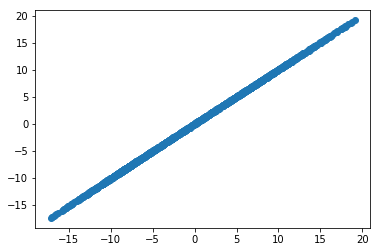

In [32]:
plt.scatter(yt0hat, yt0_test)
plt.show()

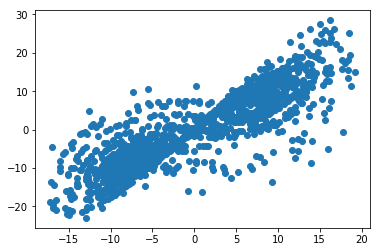

In [33]:
plt.scatter(Xt_test[:,0], Xt_test[:,1])
plt.show()

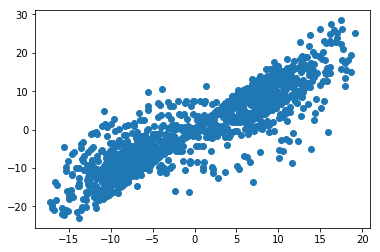

In [34]:
plt.scatter(yt0hat, Xt_test[:,1])
plt.show()

Rather good fit. SHAP tells us: the prediction is dominated by the previous value (which makes sense because x0[t+1] ~ x0[t]).

## Export Model
Export models NN0, NN1 and NN2 to analyse with SHAP-package. 
Hopefully, SHAP notices some interactions for -x0*x2 in NN1 and x0*x1 in NN2.

In [39]:
# serialize model to JSON
model_json = NN0.to_json()
with open("NN_Lorenz_dotX0.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights 
NN0.save_weights("NN_Lorenz_dotX0.tf",save_format='tf')

In [42]:
NN0.predict(np.ones(3).reshape(1,-1))

array([[0.0629824]], dtype=float32)

In [44]:
# serialize model to JSON
model_json = NN1.to_json()
with open("NN_Lorenz_dotX1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights 
NN1.save_weights("NN_Lorenz_dotX1.tf",save_format='tf')
print(NN1.predict(np.ones(3).reshape(1,-1)))

# serialize model to JSON
model_json = NN2.to_json()
with open("NN_Lorenz_dotX2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights 
NN2.save_weights("NN_Lorenz_dotX2.tf",save_format='tf')
NN2.predict(np.ones(3).reshape(1,-1))

[[0.11776029]]


array([[-0.05398235]], dtype=float32)